# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [194]:
# !https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [196]:
df=pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [197]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,"G.V.C., LTD.",15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,"G.V.C., LTD.",10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,"G.V.C., LTD.",10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [198]:
df.sample(10)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
16340,2015-2016,1235741,Pre-K/EI,4010,B0903Z,Other,C008,12/10/2015 02:35:00 PM,12/10/2015 02:48:00 PM,Brooklyn,L & M BUS CORP.,20 mins,16,Yes,Yes,No,12/10/2015 02:48:00 PM,NaN,12/10/2015 02:48:22 PM,Running Late,Pre-K
89635,2016-2017,1310373,General Ed AM Run,2647,Q2457,Heavy Traffic,"24125,24421",12/21/2016 06:59:00 AM,12/21/2016 07:02:00 AM,Queens,BOBBY`S BUS CO. INC.,45 MINS,0,No,No,No,12/21/2016 07:02:00 AM,NaN,12/21/2016 07:02:16 AM,Running Late,School-Age
5895,2015-2016,1212884,Special Ed AM Run,1230,L505,Heavy Traffic,14432,09/08/2015 08:46:00 AM,09/08/2015 08:48:00 AM,NaN,"RELIANT TRANS, INC. (B232",45 mins,0,Yes,Yes,Yes,09/08/2015 08:48:00 AM,NaN,09/08/2015 08:48:02 AM,Running Late,School-Age
50668,2015-2016,1220658,Special Ed AM Run,583D,Q517,Heavy Traffic,25020,10/09/2015 06:30:00 AM,10/09/2015 07:51:00 AM,Queens,LITTLE RICHIE BUS SERVICE,30 MIN,0,Yes,Yes,No,10/09/2015 07:51:00 AM,NaN,10/09/2015 07:51:33 AM,Running Late,School-Age
32994,2015-2016,1253024,Special Ed AM Run,013014,X824,Heavy Traffic,"08101,08413",03/01/2016 08:25:00 AM,03/01/2016 08:30:00 AM,Bronx,HOYT TRANSPORTATION CORP.,20mns,1,Yes,Yes,Yes,03/01/2016 08:30:00 AM,284876,03/01/2016 08:32:29 AM,Running Late,School-Age
111582,2016-2017,1332806,Special Ed PM Run,5003,X265,Heavy Traffic,10015,03/21/2017 02:01:00 PM,03/21/2017 02:03:00 PM,Bronx,PIONEER TRANSPORTATION CO,20 min,0,Yes,No,No,03/21/2017 02:03:00 PM,NaN,03/21/2017 02:03:53 PM,Running Late,School-Age
16880,2015-2016,1236296,Special Ed AM Run,1721,M098,Heavy Traffic,04112,12/14/2015 07:41:00 AM,12/14/2015 07:43:00 AM,Manhattan,PHILLIP BUS CORP (B2192),20mins,3,Yes,No,No,12/14/2015 07:43:00 AM,NaN,12/14/2015 07:43:48 AM,Running Late,School-Age
48315,2015-2016,1268616,General Ed AM Run,858,Q2988,Won`t Start,29035,05/16/2016 09:50:00 AM,05/16/2016 10:01:00 AM,Queens,PRIDE TRANSPORTATION (SCH,NaN,0,Yes,Yes,Yes,05/16/2016 10:01:00 AM,NaN,05/16/2016 10:01:38 AM,Breakdown,School-Age
124161,2016-2017,1345457,Special Ed AM Run,4,W753,Heavy Traffic,75619,05/04/2017 07:57:00 AM,05/04/2017 07:58:00 AM,Westchester,MAR-CAN TRANSPORT CO. INC,1 HOUR,3,Yes,No,No,05/04/2017 07:58:00 AM,NaN,05/04/2017 08:32:40 AM,Running Late,School-Age
95326,2016-2017,1316232,General Ed AM Run,2354,K1831,Mechanical Problem,"18114,18115",01/18/2017 06:00:00 AM,01/18/2017 06:18:00 AM,Brooklyn,JOFAZ TRANSPORTATION INC.,???????,0,Yes,No,No,01/18/2017 06:18:00 AM,NaN,01/18/2017 06:18:53 AM,Running Late,School-Age


In [199]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,"G.V.C., LTD.",15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,"G.V.C., LTD.",20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,G.V.C. LTD. (B2192),20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,LITTLE RICHIE BUS SERVICE,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,"RELIANT TRANS, INC. (B232",45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [201]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [202]:
for col in df.select_dtypes('object'):
    print(col)
    print(df[col].unique())
    print()

School_Year
['2015-2016' '2016-2017' '2017-2018' '2019-2020']

Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']

Bus_No
['811' '9302' '358' ... '0096' 'GVC510' 'K9345']

Route_Number
['1' '2' 'P640' ... '012' '29AM' '1409B']

Reason
['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]

Schools_Serviced
['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']

Occurred_On
['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']

Created_On
['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '05/25/2017 04:28:00 PM'
 '05/25/2017 04:30:00 PM' '05/25/201

In [203]:
df=df.drop(columns=('Busbreakdown_ID'))
df=df.drop(columns=('Incident_Number'))
df=df.drop(columns=('Bus_Company_Name'))

df=df.drop(columns=('Created_On'))
df=df.drop(columns=('Occurred_On'))

df=df.drop(columns=('Last_Updated_On'))
df=df.drop(columns=('Informed_On'))

In [204]:
# df['Informed_On'] = pd.to_datetime(df['Informed_On'])
# df['Last_Updated_On'] = pd.to_datetime(df['Last_Updated_On'])

# df['Created_On'] = pd.to_datetime(df['Created_On'])
# df['Occurred_On'] = pd.to_datetime(df['Occurred_On'])

In [205]:
df['Number_Of_Students_On_The_Bus'] = pd.to_numeric(df['Number_Of_Students_On_The_Bus'])

In [206]:
yesno_cols = ['Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT']
for col in yesno_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [207]:
df['How_Long_Delayed'].value_counts()

,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Run_Type                         147883 non-null  object
 2   Bus_No                           147972 non-null  object
 3   Route_Number                     147884 non-null  object
 4   Reason                           147870 non-null  object
 5   Schools_Serviced                 147972 non-null  object
 6   Boro                             141654 non-null  object
 7   How_Long_Delayed                 126342 non-null  object
 8   Number_Of_Students_On_The_Bus    147972 non-null  int64 
 9   Has_Contractor_Notified_Schools  147972 non-null  int64 
 10  Has_Contractor_Notified_Parents  147972 non-null  int64 
 11  Have_You_Alerted_OPT             147972 non-null  int64 
 12  Breakdown_or_Run

In [209]:
df.duplicated().sum()

19957

In [210]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [211]:
df.isna().sum()

,0
School_Year,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Boro,5714
How_Long_Delayed,20714
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

<Axes: >

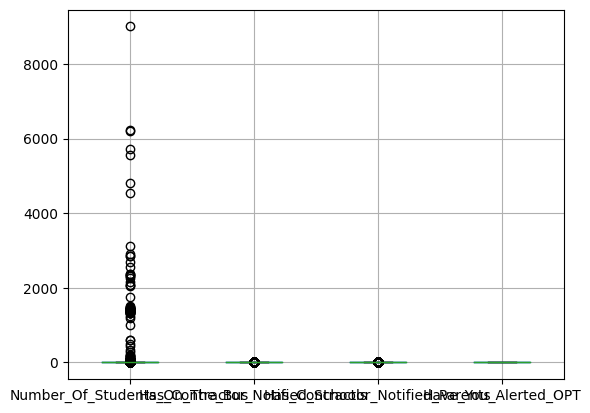

In [212]:
df.boxplot()

<Axes: ylabel='Number_Of_Students_On_The_Bus'>

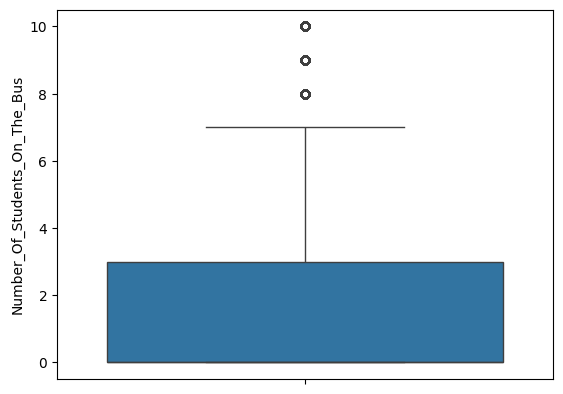

In [213]:
import numpy as np

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df=remove_outliers(df,'Number_Of_Students_On_The_Bus')
sns.boxplot(df['Number_Of_Students_On_The_Bus'])

In [214]:
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)
df['Reason'].fillna(df['Reason'].mode()[0], inplace=True)
df['Run_Type'].fillna(df['Run_Type'].mode()[0], inplace=True)
df['Route_Number'].fillna(df['Route_Number'].mode()[0], inplace=True)

In [215]:
df.isna().sum()

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Boro,0
How_Long_Delayed,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0


In [216]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()

df['School_Year']=L.fit_transform(df['School_Year'])
df['Reason']=L.fit_transform(df['Reason'])
df['School_Age_or_PreK']=L.fit_transform(df['School_Age_or_PreK'])
df['Boro']=L.fit_transform(df['Boro'])
df['Bus_No']=L.fit_transform(df['Bus_No'])
df['Route_Number']=L.fit_transform(df['Route_Number'])
df['Schools_Serviced']=L.fit_transform(df['Schools_Serviced'])
df['How_Long_Delayed']=L.fit_transform(df['How_Long_Delayed'])
df['Run_Type']=L.fit_transform(df['Run_Type'])
df['Breakdown_or_Running_Late']=L.fit_transform(df['Breakdown_or_Running_Late'])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121318 entries, 0 to 147971
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      121318 non-null  int64
 1   Run_Type                         121318 non-null  int64
 2   Bus_No                           121318 non-null  int64
 3   Route_Number                     121318 non-null  int64
 4   Reason                           121318 non-null  int64
 5   Schools_Serviced                 121318 non-null  int64
 6   Boro                             121318 non-null  int64
 7   How_Long_Delayed                 121318 non-null  int64
 8   Number_Of_Students_On_The_Bus    121318 non-null  int64
 9   Has_Contractor_Notified_Schools  121318 non-null  int64
 10  Has_Contractor_Notified_Parents  121318 non-null  int64
 11  Have_You_Alerted_OPT             121318 non-null  int64
 12  Breakdown_or_Running_Late        12

In [218]:
df['Breakdown_or_Running_Late'].value_counts()

,count
Breakdown_or_Running_Late,
1,105238
0,16080


In [219]:
df.describe()

,School_Year,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
count,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000,121318.000000
mean,0.574787,5.804044,4684.013032,5223.662466,4.201957,2755.603233,3.503198,752.835688,1.808050,0.932615,0.752988,0.337848,0.867456,0.891360
std,0.518673,2.762418,2975.389465,3327.579906,1.928806,1558.462078,2.693195,395.414298,2.672151,0.250688,0.431276,0.472978,0.339083,0.311188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,1909.250000,2222.000000,3.000000,1312.000000,1.000000,582.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,1.000000,7.000000,4395.000000,4666.000000,3.000000,2777.000000,2.000000,629.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,7.000000,7312.000000,8334.000000,6.000000,4217.000000,5.000000,1023.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,9.000000,10616.000000,11133.000000,9.000000,5092.000000,10.000000,1807.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# df['Number_Of_Students_On_The_Bus'] = scaler.fit_transform(df['Number_Of_Students_On_The_Bus'])

In [221]:
# dfc=df['Breakdown_or_Running_Late'].corr()
# sns.heatmap(df['Breakdown_or_Running_Late'].corr().sort_value().drop('Breakdown_or_Running_Late').to_frame())

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [222]:
X=df.drop(columns=['How_Long_Delayed'])
y=df['How_Long_Delayed']

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [224]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout

model=Sequential()

In [225]:
df.shape

(121318, 14)

In [226]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(92, activation='relu'))
model.add(Dense(92, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [227]:
model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [228]:
history=model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 7.1567e-06 - loss: -963218558156800.0000 - val_accuracy: 0.0000e+00 - val_loss: -29457679592194048.0000
Epoch 2/5
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 9.6503e-07 - loss: -92715690946985984.0000 - val_accuracy: 0.0000e+00 - val_loss: -508385692460515328.0000
Epoch 3/5
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 2.7237e-05 - loss: -852425389052526592.0000 - val_accuracy: 0.0000e+00 - val_loss: -2440690963534839808.0000
Epoch 4/5
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 2.1652e-06 - loss: -3382810250573774848.0000 - val_accuracy: 0.0000e+00 - val_loss: -7316307601384275968.0000
Epoch 5/5
2124/2124 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 3.5167e-05 - loss: -9332071955399966720.0000 - val_accuracy: 0.0000e+00 - val_loss: -17166627765466693632.0000


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [229]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print("Loss:", loss)

1138/1138 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: -17073673952942882816.0000
Test Accuracy: 0.00%
Loss: -1.7092848336219668e+19


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [230]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

1138/1138 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [231]:
from sklearn.metrics import classification_report


cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       7.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       2.0
          11       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       3.0
          18       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00     179.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00     131.0
          29       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       8.0
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

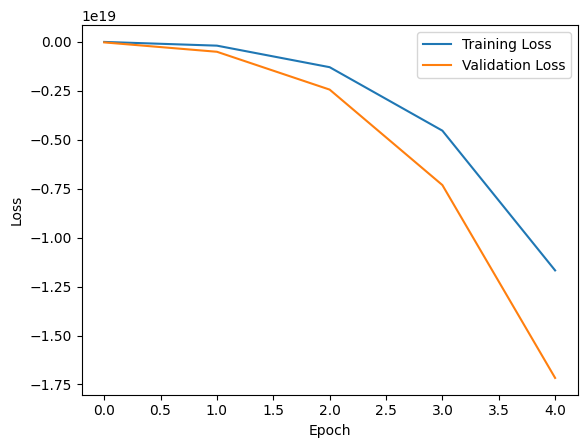

In [232]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

In [233]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

